# Train
Run training command on multiple gpus

In [ ]:
#%torchrun --standalone --nnodes=1 --nproc_per_node=2 /dbfs/imseg/train.py

# Visualize
Plot a few validation data images and also the model results

In [1]:
import os
import sys
sys.path.insert(0, "../src")

import matplotlib.pyplot as plt
import numpy as np
import torch

from model.data_loader import FashionpediaDataset, get_transform
from utils.vis_utils import vis_data

torch.manual_seed(0)
np.random.seed(0)

plt.style.use('dark_background')

In [2]:
data_path = "../../../datasets/Fashionpedia"
val_json = "annotations/val.json"
val_img_path = "images/test"
model_path = "../experiments/base"

In [3]:
model = torch.load(os.path.join(model_path, "segm.pth"), map_location=torch.device('cpu'))
model.eval();

In [4]:
val_dataset = FashionpediaDataset(data_path, val_json, val_img_path, transforms=get_transform(False))
categories = val_dataset.categories

In [5]:
i = np.random.randint(0, len(val_dataset))
val_im, val_target = val_dataset[i]

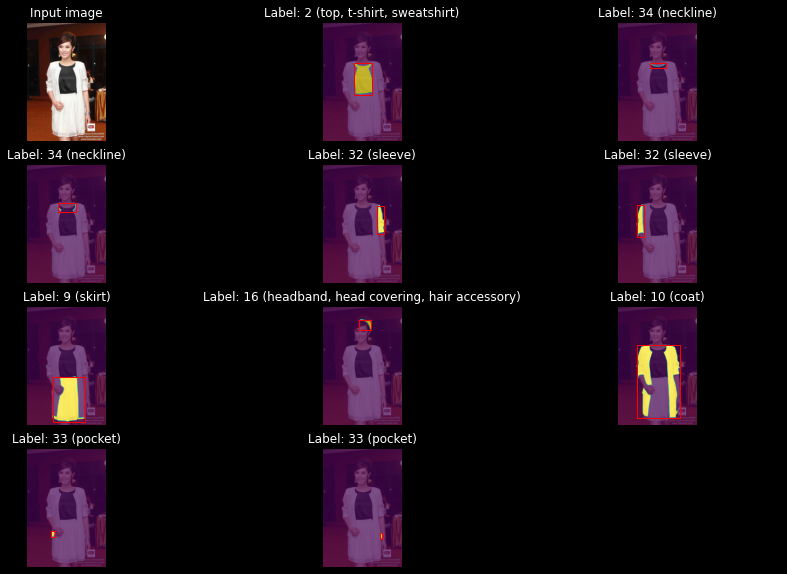

In [6]:
vis_data(val_im.numpy().transpose(1, 2, 0),
         val_target,
         categories,
         num_cols=3,
         figsize=(15, 10))

In [7]:
pred = model([val_im])

C:\Users\karmp\Miniconda3\envs\imseg-env\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


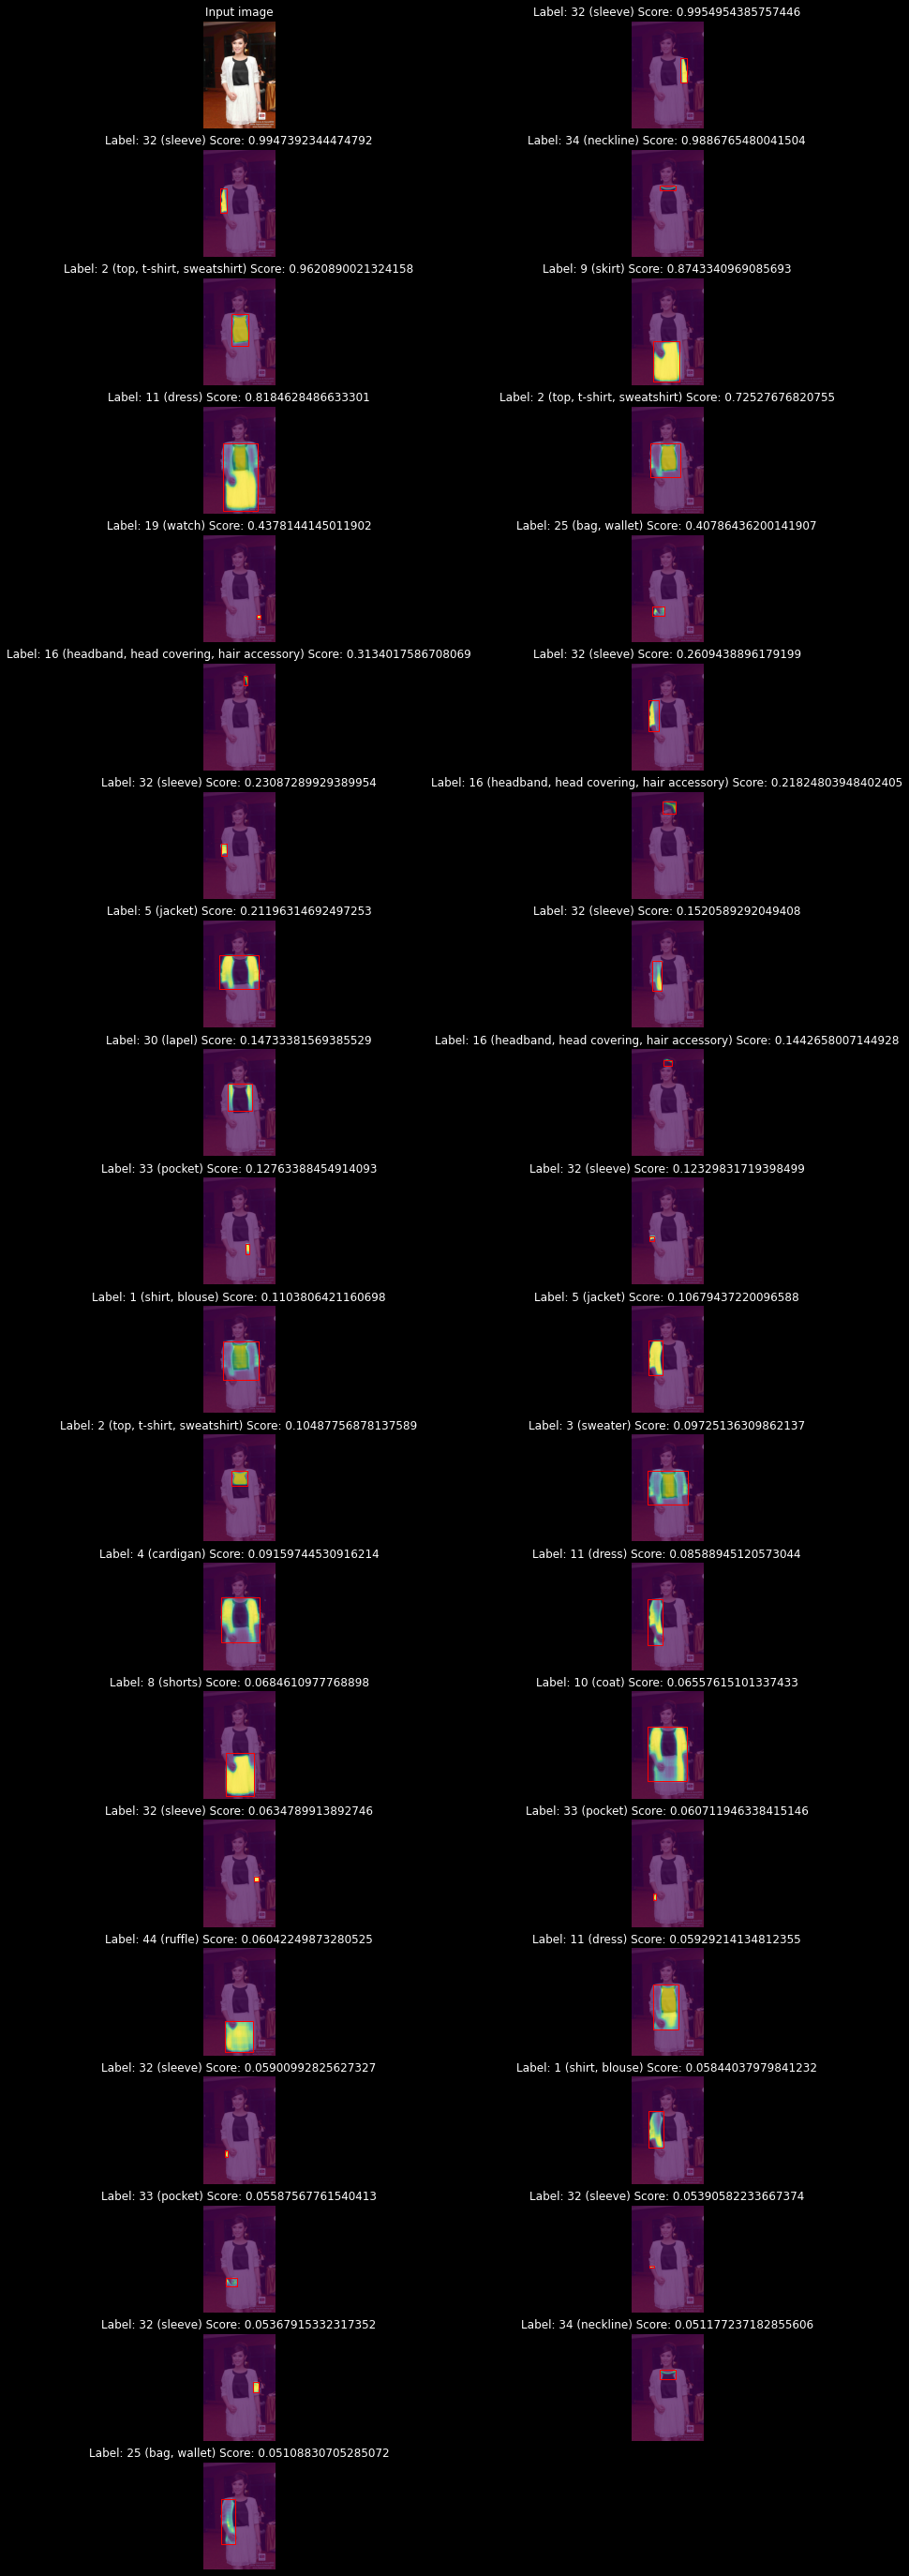

In [9]:
vis_data(val_im.numpy().transpose(1, 2, 0),
         pred[0],
         categories,
         num_cols=2,
         figsize=(15, 50))